# About

find out how to select features from a sparse matrix

In [1]:
# basic standard libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
import inspect
import datetime

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# we will using seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

# we will also need our custom data transformers
%reload_ext autoreload
%autoreload 2
import src.features.build_features as bf

In [2]:
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

In [3]:
# shuffles the train and test dataframes
train_data, train_labels, dev_data, dev_labels, test_data, test_ids = bf.prep_data(train_pd, test_pd, dev_size = 0.2)

In [4]:
# ingredients for our pipeline
selector2 = bf.DataFrameSelector(attribute_names = ["Address"], as_df = True)
sfcc_addr = bf.SFCCAddressTransformer()
ohe = OneHotEncoder()

# sets up the pipelines to transform the data and extract new features
pipe2 = Pipeline([
    ("selector2", selector2)
    ,("sfcc_addr", sfcc_addr)
    ,("ohe", ohe)
])

# extracts all features from train data
train_prepared = pipe2.fit_transform(train_data)

# also prepares dev data
dev_prepared = pipe2.fit_transform(dev_data)

# full list of features, by combining the features from pipe1 
# and the features from the one-hot encoder from pipe2
all_features = ohe.get_feature_names().tolist()

# fits our random forest classifier, to get feature importance
rfc = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 10, n_jobs = None, random_state = 0)
_ = rfc.fit(train_prepared, train_labels)

# constructs the feature importance as a dataframe for more analysis
feature_importances = list(zip(all_features, rfc.feature_importances_))
feature_importances = pd.DataFrame(feature_importances, columns = ["feature", "importance"])

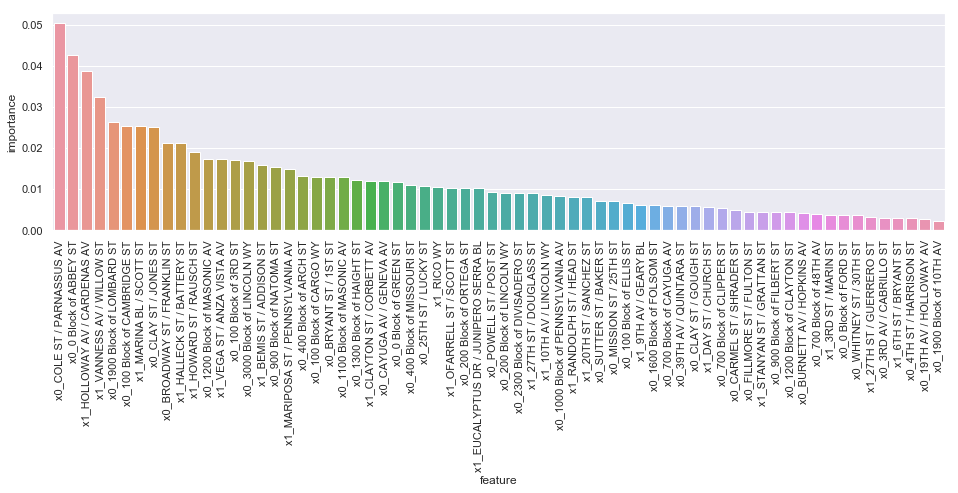

In [5]:
dat = feature_importances.query("importance > 0").sort_values(by = "importance", ascending = False)

sns.set(rc = {"figure.figsize" : (16, 4)})
ax = sns.barplot(x = "feature", y = "importance", data = dat).\
    set_xticklabels(dat['feature'], rotation = 90)

In [7]:
feature_importances.query("importance > 0").shape

(66, 2)

In [8]:
feature_importances.query("importance > 0").head()

,feature,importance
36,x0_0 Block of ABBEY ST,0.042508
481,x0_0 Block of FORD ST,0.003733
554,x0_0 Block of GREEN ST,0.011853
1404,x0_100 Block of 3RD ST,0.017103
1531,x0_100 Block of CAMBRIDGE ST,0.025429


In [9]:
list(feature_importances.query("importance > 0").index)

[36,
 481,
 554,
 1404,
 1531,
 1539,
 1669,
 2404,
 2611,
 2789,
 2864,
 3089,
 3826,
 4464,
 4564,
 4624,
 5082,
 5165,
 6017,
 6511,
 7624,
 8206,
 8214,
 8379,
 8621,
 9098,
 10087,
 10138,
 10149,
 10812,
 10890,
 11592,
 11677,
 11760,
 11955,
 12006,
 12182,
 12186,
 12307,
 12961,
 15319,
 16335,
 17197,
 17955,
 18060,
 18561,
 18936,
 18937,
 19214,
 19457,
 19550,
 20182,
 21092,
 21445,
 21879,
 22979,
 23233,
 23292,
 24531,
 24547,
 25528,
 26232,
 26324,
 27068,
 27859,
 27864]

In [10]:
train_prepared.shape

(702439, 36505)

In [14]:
type(train_prepared)

scipy.sparse.csr.csr_matrix

In [23]:
print(train_prepared[0])

  (0, 4741)	1.0
  (0, 27742)	1.0


In [24]:
print(train_prepared[400])

  (0, 3894)	1.0
  (0, 29309)	1.0


In [26]:
# bf.translate_sparse(train_prepared[0], all_features)
all_features[3894]

'x0_1600 Block of PALOU AV'

In [32]:
print(train_prepared[:, [1,2]])

  (19591, 1)	1.0
  (31247, 0)	1.0
  (41940, 1)	1.0
  (42553, 1)	1.0
  (56128, 1)	1.0
  (56351, 1)	1.0
  (69451, 1)	1.0
  (142992, 1)	1.0
  (166989, 1)	1.0
  (176626, 1)	1.0
  (209287, 1)	1.0
  (217869, 1)	1.0
  (221532, 1)	1.0
  (224589, 1)	1.0
  (271329, 1)	1.0
  (283854, 1)	1.0
  (320714, 1)	1.0
  (345637, 1)	1.0
  (373145, 1)	1.0
  (380707, 1)	1.0
  (405517, 0)	1.0
  (407833, 1)	1.0
  (408610, 1)	1.0
  (428979, 1)	1.0
  (452364, 1)	1.0
  (466626, 1)	1.0
  (472312, 0)	1.0
  (472672, 1)	1.0
  (483616, 1)	1.0
  (511399, 1)	1.0
  (520941, 1)	1.0
  (538997, 1)	1.0
  (557479, 1)	1.0
  (561429, 1)	1.0
  (567729, 0)	1.0
  (580030, 1)	1.0
  (601490, 1)	1.0
  (610609, 1)	1.0
  (670984, 1)	1.0
  (685732, 1)	1.0
  (688136, 1)	1.0


In [12]:
dat = train_prepared[:, list(feature_importances.query("importance > 0").index)]
dat.shape

(702439, 66)

In [ ]:
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
# this appears to crash the laptop again

from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 10))
sel.fit(train_prepared, train_labels)


In [ ]:
sel.get_support()

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()